In [1]:
import pandas as pd
import numpy as np

In [4]:
xlsx = pd.ExcelFile("./data/Research Analyst Sample Problem.xlsx")
internal = pd.read_excel(xlsx, 'Internal Call Center Data', header = 1)
external = pd.read_excel(xlsx, 'External Call Center Data', header = 2)

In [5]:
internal.head()

,Year,Day,Month,30MinSegment,Rep(s) Present,Phone (minutes),Shrinkage (minutes),Work (minutes),Rep Call Count,Rep Call Time,Claims Entered
0,2017,1,1,0.0,0,0.0,0.0,0.0,0,0.0,0
1,2017,1,1,0.5,0,0.0,0.0,0.0,0,0.0,0
2,2017,1,1,1.0,0,0.0,0.0,0.0,0,0.0,0
3,2017,1,1,1.5,0,0.0,0.0,0.0,0,0.0,0
4,2017,1,1,2.0,0,0.0,0.0,0.0,0,0.0,0


In [37]:
external

,Year,Date,Day,Month,Calls Offered,Calls Answered,Calls Answered LY,Calls Abnd,Gross Abandon %,Abandon w/10,...,ASA Seconds,Talk Time Seconds,Service Level,Calls Offered Core HRS,TTL Claims,TTL Claim %,TTL Claim LY,TTL Messages,Messages %,Call to Claim Ratio
0,2017,2017-01-01,Sunday,1,38,31,25,7,0.184211,5,...,25,757,0.806452,24,17,0.548387,13,0,0.000000,1.823529
1,2017,2017-01-02,Monday,1,48,39,29,9,0.187500,8,...,14,521,0.923077,42,18,0.461538,13,0,0.000000,2.166667
2,2017,2017-01-03,Tuesday,1,25,15,21,10,0.400000,8,...,9,468,0.866667,11,9,0.600000,8,0,0.000000,1.666667
3,2017,2017-01-04,Wednesday,1,15,10,16,5,0.333333,5,...,4,533,1.000000,8,7,0.700000,12,0,0.000000,1.428571
4,2017,2017-01-05,Thursday,1,24,19,21,5,0.208333,5,...,4,491,0.947368,8,10,0.526316,11,0,0.000000,1.900000
5,2017,2017-01-06,Friday,1,175,136,11,39,0.222857,39,...,2,640,0.985294,168,67,0.492647,5,0,0.000000,2.029851
6,2017,2017-01-07,Saturday,1,97,76,17,21,0.216495,19,...,6,706,0.894737,94,45,0.592105,8,1,0.013158,1.688889
7,2017,2017-01-08,Sunday,1,44,38,21,6,0.136364,5,...,25,774,0.631579,44,27,0.710526,11,0,0.000000,1.407407
8,2017,2017-01-09,Monday,1,42,31,14,11,0.261905,11,...,4,564,0.935484,37,19,0.612903,3,0,0.000000,1.631579
9,2017,2017-01-10,Tuesday,1,25,20,17,5,0.200000,5,...,7,710,0.900000,5,13,0.650000,6,0,0.000000,1.538462


In [7]:
external.columns

Index(['Year', 'Date', 'Day', 'Month', 'Calls Offered', 'Calls Answered',
       'Calls Answered LY', 'Calls Abnd', 'Gross Abandon %', 'Abandon w/10',
       'Abandon %', 'Net Abandon %', 'ASA Seconds', 'Talk Time Seconds',
       'Service Level', 'Calls Offered Core HRS', 'TTL Claims', 'TTL Claim %',
       'TTL Claim LY', 'TTL Messages', 'Messages %', ' Call to Claim Ratio'],
      dtype='object')

#### 1. What is the cost per claim entered for the internal call center based on the data presented?

In [8]:
internal = internal.rename(columns={'Year':'YEAR', 'Day':'DAY', 'Month':'MONTH'})

In [9]:
internal['datetime'] = pd.to_datetime(internal.iloc[:, :3])

In [10]:
internal.head()

,YEAR,DAY,MONTH,30MinSegment,Rep(s) Present,Phone (minutes),Shrinkage (minutes),Work (minutes),Rep Call Count,Rep Call Time,Claims Entered,datetime
0,2017,1,1,0.0,0,0.0,0.0,0.0,0,0.0,0,2017-01-01
1,2017,1,1,0.5,0,0.0,0.0,0.0,0,0.0,0,2017-01-01
2,2017,1,1,1.0,0,0.0,0.0,0.0,0,0.0,0,2017-01-01
3,2017,1,1,1.5,0,0.0,0.0,0.0,0,0.0,0,2017-01-01
4,2017,1,1,2.0,0,0.0,0.0,0.0,0,0.0,0,2017-01-01


In [11]:
internal.loc[internal['datetime'] == '2017-01-01']['Claims Entered'].value_counts()

0    192
2     48
Name: Claims Entered, dtype: int64

In [12]:
total_claims = internal.groupby('datetime')['Claims Entered'].sum().sum()
total_claims

2905200

In [62]:
cost_per_claim = internal['Rep(s) Present'].sum()*(13.25/2)/total_claims
cost_per_claim

0.16057848857221535

#### This comes to just about 16 cents per claim cost

#### 2. What is the ideal staffing based upon the information provided? Please provide information that supports/helps explain your position.

In [14]:
internal_ophours = internal.merge(external[['Date', 'Day']], how = 'inner', left_on = 'datetime', right_on = 'Date')

In [15]:
internal_ophours.drop('Date', axis = 1)

,YEAR,DAY,MONTH,30MinSegment,Rep(s) Present,Phone (minutes),Shrinkage (minutes),Work (minutes),Rep Call Count,Rep Call Time,Claims Entered,datetime,Day
0,2017,1,1,0.0,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
1,2017,1,1,0.5,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
2,2017,1,1,1.0,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
3,2017,1,1,1.5,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
4,2017,1,1,2.0,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
5,2017,1,1,2.5,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
6,2017,1,1,3.0,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
7,2017,1,1,3.5,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
8,2017,1,1,4.0,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday
9,2017,1,1,4.5,0,0.000000,0.000000,0.000000,0,0.000000,0,2017-01-01,Sunday


In [16]:
internal_ophours = internal_ophours.loc[~internal_ophours.Day.isin(['Saturday', 'Sunday'])]

In [17]:
internal_ophours = internal_ophours.loc[(internal_ophours['30MinSegment'] > 7.0) & (internal_ophours['30MinSegment'] < 17.0)]
# internal_ophours['30MinSegment'].dtypes

In [18]:
internal_ophours.head()

,YEAR,DAY,MONTH,30MinSegment,Rep(s) Present,Phone (minutes),Shrinkage (minutes),Work (minutes),Rep Call Count,Rep Call Time,Claims Entered,datetime,Date,Day
255,2017,2,1,7.5,2,53.633333,22.766667,5.233333,3,18.716667,64,2017-01-02,2017-01-02,Monday
256,2017,2,1,8.0,2,96.150000,6.233333,20.733333,8,48.550000,64,2017-01-02,2017-01-02,Monday
257,2017,2,1,8.5,3,152.183333,18.816667,15.750000,6,41.850000,64,2017-01-02,2017-01-02,Monday
258,2017,2,1,9.0,3,139.916667,39.300000,22.833333,7,62.383333,64,2017-01-02,2017-01-02,Monday
259,2017,2,1,9.5,3,243.283333,0.083333,15.816667,6,42.733333,64,2017-01-02,2017-01-02,Monday


In [19]:
internal['Rep Call Count'].mean()

4.272317351598174

In [20]:
internal['Rep Call Time'].mean()

29.17407819634707

#### Overall on average you would need 4 Reps on the phone every 30 min window

In [21]:
internal_ophours['Rep Call Count'].mean()

10.65576923076923

In [22]:
internal_ophours['Rep Call Time'].mean()

72.91432860998658

In [23]:
(internal_ophours['Rep Call Count'].mean())/30*(internal_ophours['Rep Call Time'].mean())

25.898608642816388

#### During operations hours, on average you are getting 10 calls every 30 min. Each of those calls lasts an average of 72 min. Therefore you would need about 26 reps on duty on average throughout the course of a normal work day. This would of course need ot be adjusted for peak call times as far as how that average is distributed. 

####   3. What model would you use to establish a call center model? Why?  Please provide information that supports/helps explain your position.

In [51]:
internal.groupby('MONTH')['Rep Call Count'].describe()

,count,mean,std,min,25%,50%,75%,max
MONTH,,,,,,,,
1,2976.0,4.043011,6.982487,0.0,0.0,0.0,7.00,38.0
2,2688.0,4.138393,7.249463,0.0,0.0,0.0,7.00,33.0
3,2976.0,4.632728,7.625864,0.0,0.0,0.0,9.00,33.0
4,2880.0,4.293403,7.316615,0.0,0.0,0.0,8.00,34.0
5,2976.0,4.719422,7.899084,0.0,0.0,0.0,9.00,38.0
6,2880.0,4.157292,7.267664,0.0,0.0,0.0,7.00,39.0
7,2976.0,3.634409,7.258452,0.0,0.0,0.0,3.00,42.0
8,2976.0,4.998320,8.034484,0.0,0.0,0.0,11.00,33.0
9,2880.0,4.313542,7.668584,0.0,0.0,0.0,6.00,37.0


In [52]:
external.groupby('Month')['Calls Offered'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,93.0,60.258065,42.295005,6.0,29.00,48.0,79.00,226.0
2,56.0,39.910714,27.101343,6.0,22.00,34.5,47.00,115.0
3,62.0,45.145161,30.094848,15.0,27.50,33.0,52.50,129.0
4,60.0,57.216667,39.498162,19.0,35.00,43.0,58.50,244.0
5,62.0,54.612903,26.746138,16.0,37.25,49.0,58.75,141.0
6,60.0,56.150000,28.257787,19.0,39.00,48.0,62.75,146.0
7,62.0,55.354839,25.346838,18.0,35.25,46.0,65.50,120.0
8,62.0,56.032258,24.825270,23.0,37.00,49.0,66.50,126.0
9,60.0,65.100000,32.100319,13.0,48.00,57.0,81.00,173.0


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

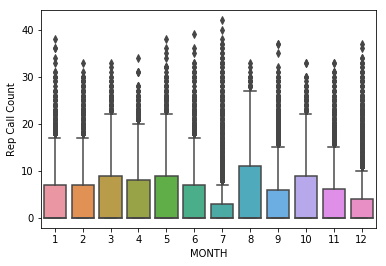

In [53]:
sns.boxplot(data = internal, x = "MONTH", y = "Rep Call Count");

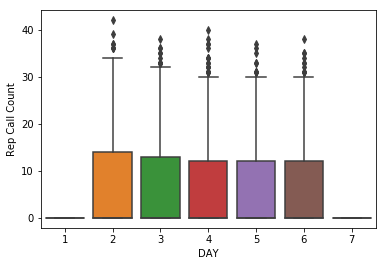

In [55]:
sns.boxplot(data = internal, x = "DAY", y = "Rep Call Count");

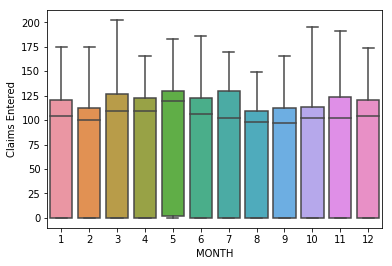

In [57]:
sns.boxplot(data = internal, x = "MONTH", y = "Claims Entered");

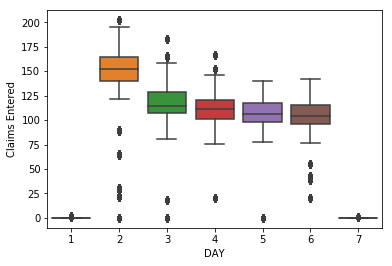

In [56]:
sns.boxplot(data = internal, x = "DAY", y = "Claims Entered");

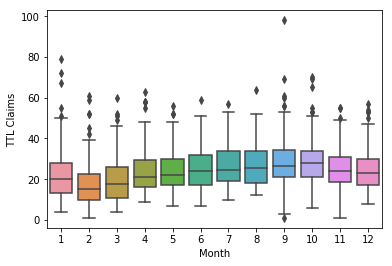

In [31]:
sns.boxplot(data = external, x = "Month", y = "TTL Claims");

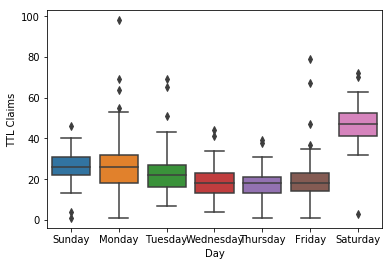

In [32]:
sns.boxplot(data = external, x = "Day", y = "TTL Claims");

#### Looking at the averages and distributions of claims filed over each weekday and from month to month (incoming calls seem to vary widely), there seems to be a defined range that the claim amounts seem to lie in. For this reason I would run a Linear Regression to forecast staffing levels. The less drastic changes appear to occur month to month, so I would train the model using a 30 day rolling window. Any more than 30 days could cause for inaccuracies in the forecast as more fluctuations in call volume influence the regression.  I would also use the date and day of the week as training features, to attempt to account for weekend and holiday peaks and decreases. In order to have a more accurate model, a larger amount of data would be preferred going back at least 5 years to establish any annual patterns.

#### 4. If the model proves effective, what are the projected annual savings (in dollars) to the organization? Please provide information that supports/helps explain your position.

In [58]:
external.head()

,Year,Date,Day,Month,Calls Offered,Calls Answered,Calls Answered LY,Calls Abnd,Gross Abandon %,Abandon w/10,...,ASA Seconds,Talk Time Seconds,Service Level,Calls Offered Core HRS,TTL Claims,TTL Claim %,TTL Claim LY,TTL Messages,Messages %,Call to Claim Ratio
0,2017,2017-01-01,Sunday,1,38,31,25,7,0.184211,5,...,25,757,0.806452,24,17,0.548387,13,0,0.0,1.823529
1,2017,2017-01-02,Monday,1,48,39,29,9,0.187500,8,...,14,521,0.923077,42,18,0.461538,13,0,0.0,2.166667
2,2017,2017-01-03,Tuesday,1,25,15,21,10,0.400000,8,...,9,468,0.866667,11,9,0.600000,8,0,0.0,1.666667
3,2017,2017-01-04,Wednesday,1,15,10,16,5,0.333333,5,...,4,533,1.000000,8,7,0.700000,12,0,0.0,1.428571
4,2017,2017-01-05,Thursday,1,24,19,21,5,0.208333,5,...,4,491,0.947368,8,10,0.526316,11,0,0.0,1.900000


In [60]:
external.columns

Index(['Year', 'Date', 'Day', 'Month', 'Calls Offered', 'Calls Answered',
       'Calls Answered LY', 'Calls Abnd', 'Gross Abandon %', 'Abandon w/10',
       'Abandon %', 'Net Abandon %', 'ASA Seconds', 'Talk Time Seconds',
       'Service Level', 'Calls Offered Core HRS', 'TTL Claims', 'TTL Claim %',
       'TTL Claim LY', 'TTL Messages', 'Messages %', ' Call to Claim Ratio'],
      dtype='object')

In [67]:
external['TTL Claims'].sum()*(14-cost_per_claim)/2

133356.66568411814

#### If the model proves effective, and staffing levels can be accurately projected for call center needs, then we could attempt to broaden internal call center hours to be staffed 24/7 and phase out the use of external call centers.  Based on the difference in cost per claim rates and the number of claims filed in the external center, if the organization would be looking at a rough anual savings of $133,356

#### 5. Would you recommend providing internal staff on the weekend?  Please provide information that supports/helps explain your position.

In [68]:
external.loc[(external['Day'] =='Saturday') | (external['Day'] == 'Sunday')]['TTL Claims'].sum()*(14-cost_per_claim)

109566.70010597378

#### I would recommend staffing internally on the weekends, as the company would have saved $109,566 over the course of the two years this data was collected

#### 6. What additional information would you like to have to help the the Claims Department make an informed decision for staffing?

In [69]:
internal.columns

Index(['YEAR', 'DAY', 'MONTH', '30MinSegment', 'Rep(s) Present',
       'Phone (minutes)', 'Shrinkage (minutes)', 'Work (minutes)',
       'Rep Call Count', 'Rep Call Time', 'Claims Entered', 'datetime'],
      dtype='object')

#### I would like to know how much time on average reps are missing or calling out of their scheduled hours for each time frame, so that staffing can be adjusted accordingly. I would need to know the dates of when new products were introduced, or when existing products were offered for the first time to new territories. It would be important to track and know how market expansion impacts call volumes over time.

#### 7. The data presented on the other two tabs is derived compleletely from data sets outside of the organization's data warehouse. How would you recommend this data be collected going forward to feed the model? Please explain.

#### Call amounts and staffing can easily be monitored and cataloged by monitoring the phones used by reps. This is an easy way to keep track of the number of reps on the clock, the number of inbound calls, call length, time between calls and break times. These can be timestamped and categorized into 30 min marks according to the clocks in the phones. The claims entered should be monitored by the computer at each work station and attributed to the individual rep, to keep an active count and ensure quality.  All of this data can be compiled into similar tables as seen on the other tabs. Then in accordance with the model explained above, the newly compiled data can be fed into the model every 30 days to train and forcast for the nest month.